<a href="https://colab.research.google.com/github/kaif22mohammed/Data-science-learning/blob/main/Job_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
df = pd.read_csv(r'https://raw.githubusercontent.com/kaif22mohammed/practice/main/ds_salaries.csv?token=GHSAT0AAAAAABY4CFKVYO2NEBBSFH3FPNB2YZWRNWQ')

In [84]:
df.head(11)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [85]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [86]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [87]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [88]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

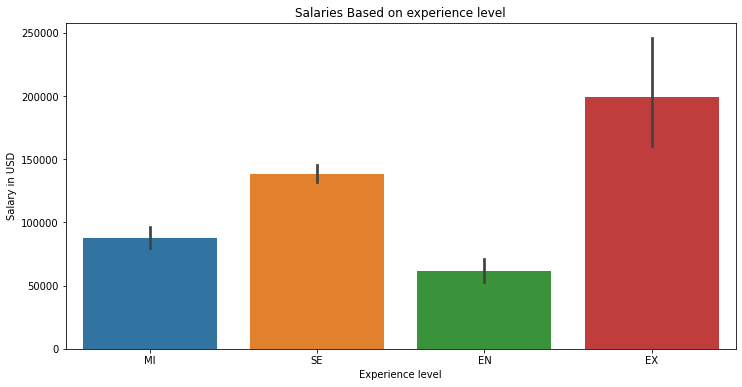

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(x= df['experience_level'],y = df['salary_in_usd'])
plt.title("Salaries Based on experience level")
plt.xlabel('Experience level')
plt.ylabel('Salary in USD')
plt.show()

In [90]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [97]:
job_title = df['job_title'].to_frame()
j_title = job_title.drop_duplicates(inplace=True)
job_title.head()

,job_title
0,Data Scientist
1,Machine Learning Scientist
2,Big Data Engineer
3,Product Data Analyst
4,Machine Learning Engineer


<function matplotlib.pyplot.show(*args, **kw)>

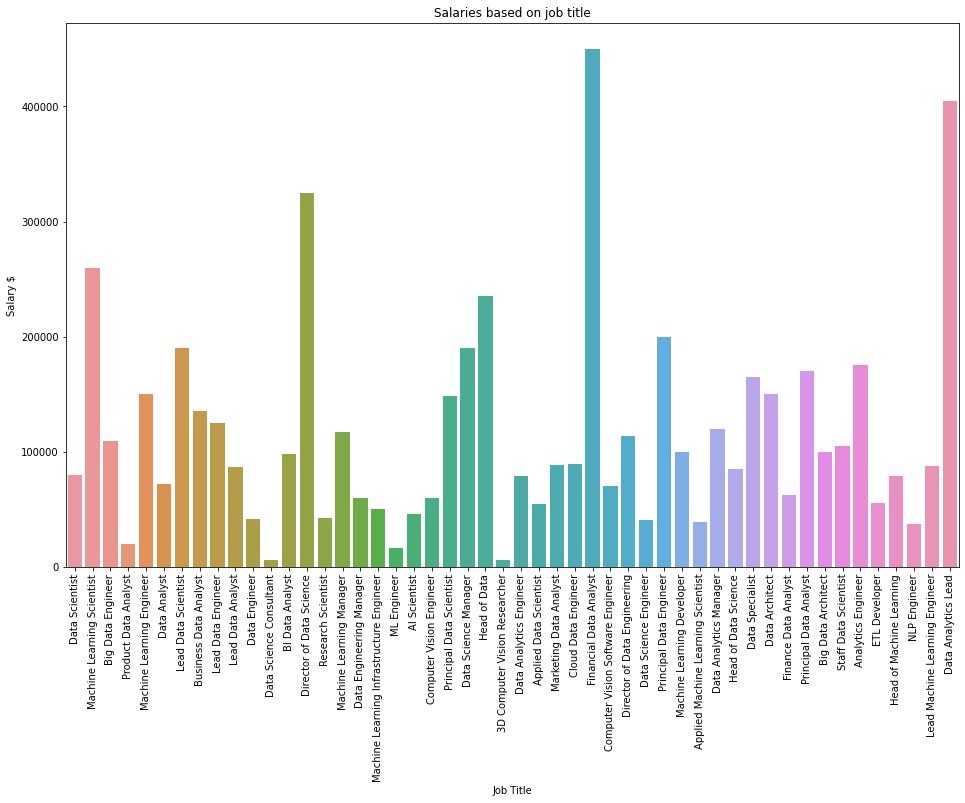

In [102]:
plt.figure(figsize=(16,10))
sns.barplot(x = job_title['job_title'], y = df['salary_in_usd'])
plt.title("Salaries based on job title")
plt.xlabel('Job Title')
plt.xticks(rotation = 90) #to rotate x axis values 
plt.ylabel('Salary $')
plt.show

In [106]:
work_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()
work_year = pd.DataFrame(work_year)
work_year.head()

,work_year,salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


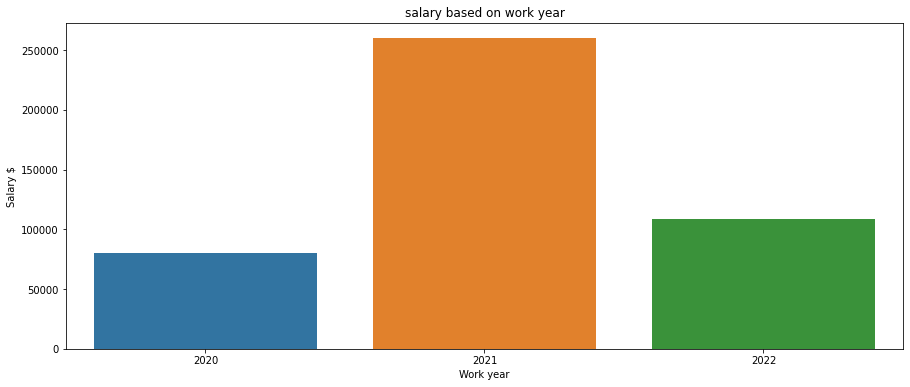

In [113]:
plt.figure(figsize=(15,6))
sns.barplot(x= work_year['work_year'], y = df['salary_in_usd'])
plt.title('salary based on work year')
plt.xlabel('Work year')
plt.ylabel('Salary $')
plt.show()

In [110]:
comp_size = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
comp_size = pd.DataFrame(comp_size)
comp_size.head()

,company_size,salary_in_usd
0,L,119242.994949
1,M,116905.466258
2,S,77632.674699


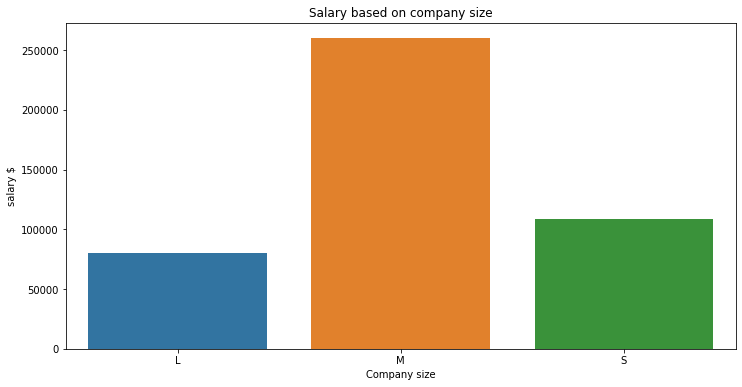

In [114]:
plt.figure(figsize=(12,6))
sns.barplot(x = comp_size['company_size'], y = df['salary_in_usd'])
plt.title('Salary based on company size')
plt.xlabel('Company size')
plt.ylabel('salary $')
plt.show()

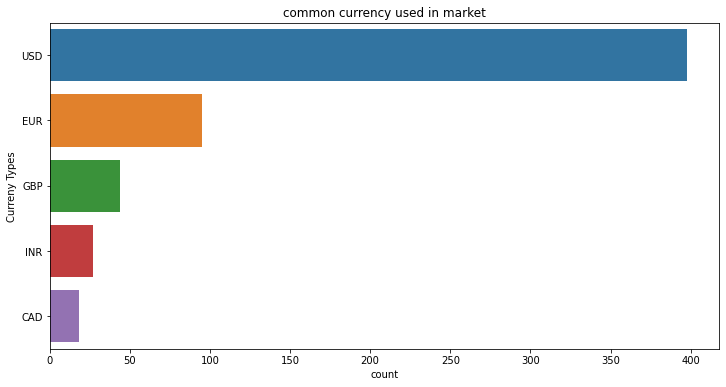

In [115]:
plt.figure(figsize=(12,6))
sns.countplot(y= df['salary_currency'], order = df['salary_currency'].value_counts().head().index)
plt.title('common currency used in market')
plt.ylabel('Curreny Types')
plt.show()

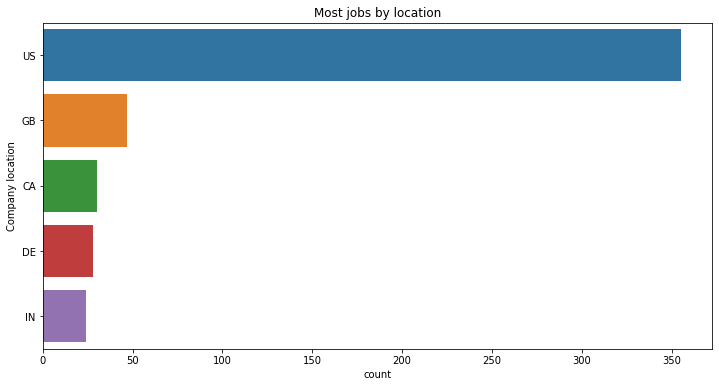

In [117]:
plt.figure(figsize=(12,6))
sns.countplot(y = df['company_location'],order = df['company_location'].value_counts().head().index)
plt.title('Most jobs by location')
plt.ylabel('Company location')
plt.show()